# **Hands On Activty 8.1 Aggregating Data with Pandas**


---

**Name**: Calingo, Christian Lei

**Section**: CPE22S3

**Course**: Computational thinking with Python

**Course Code**: CPE311

# **8.1 Intended Learning Outcomes**

After this activity, the student should be able to:

*   Demonstrate querying and merging of dataframes
*   Perform advanced calculations on dataframes
*   Aggregate dataframes with pandas and numpy
*   Work with time series data



# **8.1.2 Rersources**


*   Computing Environment using Python 3.x
*   Attached Datasets (under Instructional Materials)

# **8.1.3 Procedures**

The procedures can be found in the canvas module. Check the following under topics:

*   8.1 Weather Data Collection
*   8.2 Querying and Merging
*   8.3 Dataframe Operations
*   8.4 Aggregations
*   8.5 Time Series



# **8.1.4 Data Analysis**

Provide some comments here about the results of the procedures.



In [1]:
import pandas as pd
import numpy as np

In [2]:
eq = pd.read_csv('data/earthquakes.csv') #reading the csv file
eq

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California
...,...,...,...,...,...,...
9327,0.62,md,1537230228060,"9km ENE of Mammoth Lakes, CA",0,California
9328,1.00,ml,1537230135130,"3km W of Julian, CA",0,California
9329,2.40,md,1537229908180,"35km NNE of Hatillo, Puerto Rico",0,Puerto Rico
9330,1.10,ml,1537229545350,"9km NE of Aguanga, CA",0,California


**1. With the earthquakes.csv file, select all the earthquakes in Japan with a magType of mb and a magnitude of 4.9 or greater.**

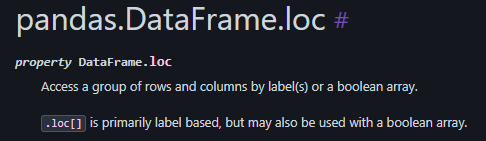

In [3]:
eq.loc[(eq['magType'] == 'mb') & (eq['mag'] >= 4.9)] #using .loc to select specific values with certain conditions

,mag,magType,time,place,tsunami,parsed_place
227,5.2,mb,1539389603790,"15km WSW of Pisco, Peru",0,Peru
229,4.9,mb,1539389546300,"193km N of Qulansiyah, Yemen",0,Yemen
248,4.9,mb,1539382925190,"151km S of Severo-Kuril'sk, Russia",0,Russia
258,5.1,mb,1539380306940,"236km NNW of Kuril'sk, Russia",0,Russia
391,5.1,mb,1539337221080,Pacific-Antarctic Ridge,0,Pacific-Antarctic Ridge
...,...,...,...,...,...,...
9154,4.9,mb,1537268270010,Southwest Indian Ridge,0,Southwest Indian Ridge
9175,5.2,mb,1537262729590,"126km N of Dili, East Timor",1,East Timor
9176,5.2,mb,1537262656830,"90km S of Raoul Island, New Zealand",0,New Zealand
9213,5.1,mb,1537255481060,South of Tonga,0,Tonga




---



---



**2. Create bins for each full number of magnitude (for example, the first bin is 0-1, the second is 1-2, and so on) with a magType of ml and count how many are in each bin.**

In [ ]:
eq['bins'] = pd.cut(eq.mag, bins = 2, labels = ['0-1', '1-2'])
eq

,mag,magType,time,place,tsunami,parsed_place,bins
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California,0-1
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California,0-1
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California,1-2
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California,0-1
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California,0-1
...,...,...,...,...,...,...,...
9327,0.62,md,1537230228060,"9km ENE of Mammoth Lakes, CA",0,California,0-1
9328,1.00,ml,1537230135130,"3km W of Julian, CA",0,California,0-1
9329,2.40,md,1537229908180,"35km NNE of Hatillo, Puerto Rico",0,Puerto Rico,0-1
9330,1.10,ml,1537229545350,"9km NE of Aguanga, CA",0,California,0-1




---



---



**3. Using the faang.csv file, group by the ticker and resample to monthly frequency. Make the following aggregations:**


*   Mean of the opening price
*   Maximum of the high price
*   Minimum of the low price
*   Mean of the closing price
*   Sum of the volume traded





In [75]:
import pandas as pd
import numpy as np

faang = pd.read_csv('data/faang.csv') #reading the faang csv
faang['date'] = pd.to_datetime(faang['date']) #chaing the data type of the date column
faang

,ticker,date,open,high,low,close,volume
0,FB,2018-01-02,177.68,181.58,177.5500,181.42,18151903
1,FB,2018-01-03,181.88,184.78,181.3300,184.67,16886563
2,FB,2018-01-04,184.90,186.21,184.0996,184.33,13880896
3,FB,2018-01-05,185.59,186.90,184.9300,186.85,13574535
4,FB,2018-01-08,187.20,188.90,186.3300,188.28,17994726
...,...,...,...,...,...,...,...
1250,GOOG,2018-12-24,973.90,1003.54,970.1100,976.22,1590328
1251,GOOG,2018-12-26,989.01,1040.00,983.0000,1039.46,2373270
1252,GOOG,2018-12-27,1017.15,1043.89,997.0000,1043.88,2109777
1253,GOOG,2018-12-28,1049.62,1055.56,1033.1000,1037.08,1413772


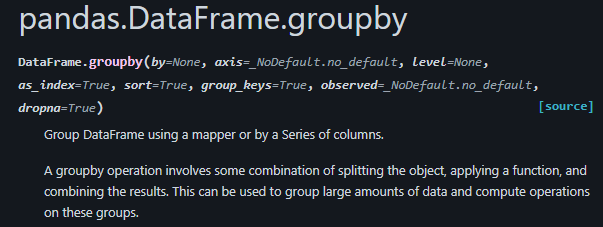

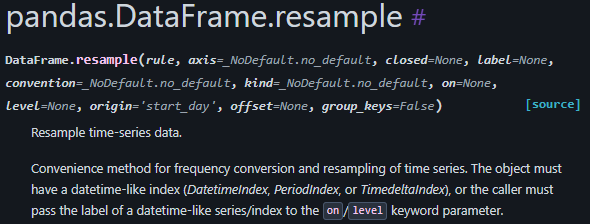

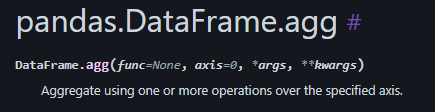

In [43]:
aggre = { #dictionary for the aggregation
    'open' : 'mean',
    'high' : 'max',
    'low' : 'min',
    'close' : 'mean',
    'volume' : 'sum'
}
faang.groupby('ticker').resample('M', on = 'date').agg(aggre)

#using the groupby() for grouping the rows
#using resample() to select the frequency
#using the agg() for the aggregations

open       high        low        close     volume
ticker date                                                                 
AAPL   2018-01-31   170.714690   176.6782   161.5708   170.699271  659679440
       2018-02-28   164.562753   177.9059   147.9865   164.921884  927894473
       2018-03-31   172.421381   180.7477   162.4660   171.878919  713727447
       2018-04-30   167.332895   176.2526   158.2207   167.286924  666360147
       2018-05-31   182.635582   187.9311   162.7911   183.207418  620976206
       2018-06-30   186.605843   192.0247   178.7056   186.508652  527624365
       2018-07-31   188.065786   193.7650   181.3655   188.179724  393843881
       2018-08-31   210.460287   227.1001   195.0999   211.477743  700318837
       2018-09-30   220.611742   227.8939   213.6351   220.356353  678972040
       2018-10-31   219.489426   231.6645   204.4963   219.137822  789748068
       2018-11-30   190.828681   220.6405   169.5328   190.246652  961321947
       2018-12-31   164.537405   184.1501   145.9639   163.564732  898917007
AMZN   2018-01-31  1301.377143  1472.5800  1170.5100  1309.010952   96371290
       2018-02-28  1447.112632  1528.7000  1265.9300  1442.363158  137784020
       2018-03-31  1542.160476  1617.5400  1365.2000  1540.367619  130400151
       2018-04-30  1475.841905  1638.1000  1352.8800  1468.220476  129945743
       2018-05-31  1590.474545  1635.0000  1546.0200  1594.903636   71615299
       2018-06-30  1699.088571  1763.1000  1635.0900  1698.823810   85941510
       2018-07-31  1786.305714  1880.0500  1678.0600  1784.649048   97629820
       2018-08-31  1891.957826  2025.5700  1776.0200  1897.851304   96575676
       2018-09-30  1969.239474  2050.5000  1865.0000  1966.077895   94445693
       2018-10-31  1799.630870  2033.1900  1476.3600  1782.058261  183228552
       2018-11-30  1622.323810  1784.0000  1420.0000  1625.483810  139290208
       2018-12-31  1572.922105  1778.3400  1307.0000  1559.443158  154812304
FB     2018-01-31   184.364762   190.6600   175.8000   184.962857  495655736
       2018-02-28   180.721579   195.3200   167.1800   180.269474  516621991
       2018-03-31   173.449524   186.1000   149.0200   173.489524  996232472
       2018-04-30   164.163557   177.1000   150.5100   163.810476  751130388
       2018-05-31   181.910509   192.7200   170.2300   182.930000  401144183
       2018-06-30   194.974067   203.5500   186.4300   195.267619  387265765
       2018-07-31   199.332143   218.6200   166.5600   199.967143  652763259
       2018-08-31   177.598443   188.3000   170.2700   177.491957  549016789
       2018-09-30   164.232895   173.8900   158.8656   164.377368  500468912
       2018-10-31   154.873261   165.8800   139.0300   154.187826  622446235
       2018-11-30   141.762857   154.1300   126.8500   141.635714  518150415
       2018-12-31   137.529474   147.1900   123.0200   137.161053  558786249
GOOG   2018-01-31  1127.200952  1186.8900  1045.2300  1130.770476   28738485
       2018-02-28  1088.629474  1174.0000   992.5600  1088.206842   42384105
       2018-03-31  1096.108095  1177.0500   980.6400  1091.490476   45430049
       2018-04-30  1038.415238  1094.1600   990.3700  1035.696190   41773275
       2018-05-31  1064.021364  1110.7500  1006.2900  1069.275909   31849196
       2018-06-30  1136.396190  1186.2900  1096.0100  1137.626667   32103642
       2018-07-31  1183.464286  1273.8900  1093.8000  1187.590476   31953386
       2018-08-31  1226.156957  1256.5000  1188.2400  1225.671739   28820379
       2018-09-30  1176.878421  1212.9900  1146.9100  1175.808947   28863199
       2018-10-31  1116.082174  1209.9600   995.8300  1110.940435   48496167
       2018-11-30  1054.971429  1095.5700   996.0200  1056.162381   36735570
       2018-12-31  1042.620000  1124.6500   970.1100  1037.420526   40256461
NFLX   2018-01-31   231.269286   286.8100   195.4200   232.908095  238377533
       2018-02-28   270.873158   297.3600   236.1100   271.443684  184585819
       2018-03-31   31



---


---


**4.Build a crosstab with the earthquake data between the tsunami column and the magType column. Rather than showing the frequency count, show the maximum
magnitude that was observed for each combination. Put the magType along the columns.**

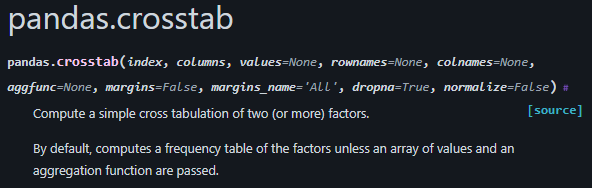

In [44]:
eq4  = pd.crosstab(
    index = eq['tsunami'], #setting the tsunami as index
    columns = eq['magType'], # setting the magType as the columns
    values=eq['mag'], # setting the values with accordance to mag column
    aggfunc='max' # function for the max value for each magType
)
eq4

magType,mb,mb_lg,md,mh,ml,ms_20,mw,mwb,mwr,mww
tsunami,,,,,,,,,,
0,5.6,3.5,4.11,1.1,4.2,NaN,3.83,5.8,4.8,6.0
1,6.1,NaN,NaN,NaN,5.1,5.7,4.41,NaN,NaN,7.5


We can also set the magType as the index and tsunami as the columns, we will have the same values but the table will look different

In [4]:
eq4_1  = pd.crosstab(
    index = eq['magType'], #setting the magType as index
    columns = eq['tsunami'], # setting the tsunami as the columns
    values=eq['mag'],
    aggfunc='max'
)
eq4_1

tsunami,0,1
magType,,
mb,5.60,6.10
mb_lg,3.50,NaN
md,4.11,NaN
mh,1.10,NaN
ml,4.20,5.10
ms_20,NaN,5.70
mw,3.83,4.41
mwb,5.80,NaN
mwr,4.80,NaN




---



---



**5. Calculate the rolling 60-day aggregations of OHLC data by ticker for the FAANG data. Use the same aggregations as exercise no. 3.**

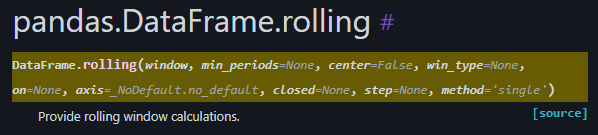

In [52]:
faang6_1 = faang.set_index('date')
faang6_1 = faang6_1.sort_index()
faang6_1 = faang6_1.groupby('ticker').rolling('60D').agg(aggre)
faang6_1

open      high       low       close       volume
ticker date                                                               
AAPL   2018-01-02  166.927100  169.0264  166.0442  168.987200   25555934.0
       2018-01-03  168.089600  171.2337  166.0442  168.972500   55073833.0
       2018-01-04  168.480367  171.2337  166.0442  169.229200   77508430.0
       2018-01-05  168.896475  172.0381  166.0442  169.840675  101168448.0
       2018-01-08  169.324680  172.2736  166.0442  170.080040  121736214.0
...                       ...       ...       ...         ...          ...
NFLX   2018-12-24  283.509250  332.0499  233.6800  281.931750  525657894.0
       2018-12-26  281.844500  332.0499  231.2300  280.777750  520444588.0
       2018-12-27  281.070488  332.0499  231.2300  280.162805  532679805.0
       2018-12-28  279.916341  332.0499  231.2300  279.461341  521968250.0
       2018-12-31  278.430769  332.0499  231.2300  277.451410  476309676.0

[1255 rows x 5 columns]



---



---



**6. Create a pivot table of the FAANG data that compares the stocks. Put the ticker in the rows and show the averages of the OHLC and volume traded data**

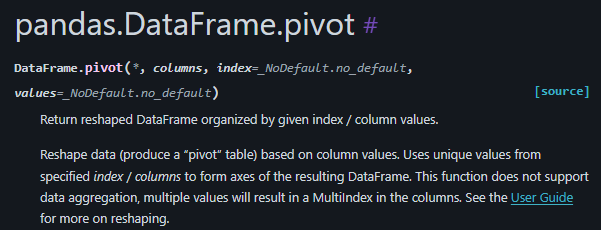

In [56]:
faang = pd.pivot_table(faang, index='ticker', values=['open', 'high', 'low', 'close', 'volume'], aggfunc='mean')
faang

,close,high,low,open,volume
ticker,,,,,
AAPL,186.986218,188.906858,185.135729,187.038674,3.402145e+07
AMZN,1641.726175,1662.839801,1619.840398,1644.072669,5.649563e+06
FB,171.510936,173.615298,169.303110,171.454424,2.768798e+07
GOOG,1113.225139,1125.777649,1101.001594,1113.554104,1.742645e+06
NFLX,319.290299,325.224583,313.187273,319.620533,1.147030e+07




---



---



**7. Calculate the Z-scores for each numeric column of Netflix's data (ticker is NFLX) using apply().**

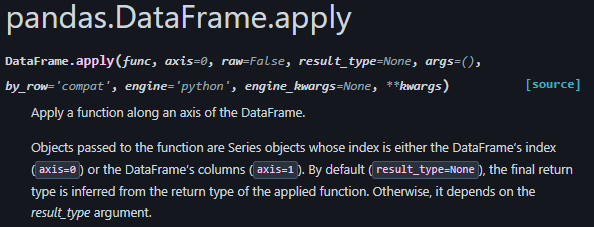

In [60]:
faang_nflx = faang.loc[faang['ticker'] == 'NFLX']# creating a new dataframe for ticker netflix and putting it in a variable for easier access
faang= faang_nflx[['open', 'high', 'low', 'close'] #accessing each column
                  ].apply(lambda x: x.sub(x.mean()).div(x.std())) #formula for the z score

faang['ticker'] = 'NFLX' #adding the NFLX
faang = faang.set_index('ticker') # setting it as the index
faang

,open,high,low,close
ticker,,,,
NFLX,-2.500753,-2.516023,-2.410226,-2.416644
NFLX,-2.380291,-2.423180,-2.285793,-2.335286
NFLX,-2.296272,-2.406077,-2.234616,-2.323429
NFLX,-2.275014,-2.345607,-2.202087,-2.234303
NFLX,-2.218934,-2.295113,-2.143759,-2.192192
...,...,...,...,...
NFLX,-1.571478,-1.518366,-1.627197,-1.745946
NFLX,-1.735063,-1.439978,-1.677339,-1.341402
NFLX,-1.407286,-1.417785,-1.495805,-1.302664




---



---



**8. Create a dataframe with the following three columns: ticker, date, and event. The columns should have the following values:**


*   ticker : 'FB'
*   date : '2018-07-25', '2018-03-19', '2018-03-20'
*   event : 'Disappointing user growth announced after close.', 'Cambridge Analytica story', 'FTC investigation'
*   Set the index to 'date', 'ticker'
*   Merge this data with the FAANG data using an outer join

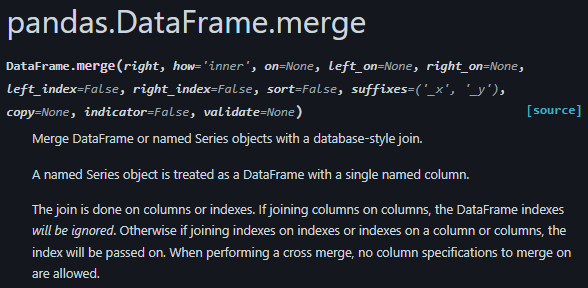





In [64]:
faang8 = faang.loc[(faang['ticker'] == 'FB') & (faang['date'].isin(['2018-07-25', '2018-03-19', '2018-03-20']))] # using the loc to locate specific values
faang8_1 = pd.DataFrame(columns = ['date','ticker','event']) #creating a new data frame with 3 columns
faang8_1['date'] = faang8['date']  #setting the values for the new data frame
faang8_1['ticker'] = faang8['ticker'] #setting the values for the new data frame
faang8_1.loc[faang['date'] == '2018-03-19', 'event'] = 'Disappointing user growth announced after close.' # setting the event for the specific day
faang8_1.loc[faang['date'] == '2018-03-20', 'event'] = 'Cambridge Analytica story' # setting the event for the specific day
faang8_1.loc[faang['date'] == '2018-07-25', 'event'] = 'FTC investigation' # setting the event for the specific day
faang8_1

,date,ticker,event
52,2018-03-19,FB,Disappointing user growth announced after close.
53,2018-03-20,FB,Cambridge Analytica story
141,2018-07-25,FB,FTC investigation


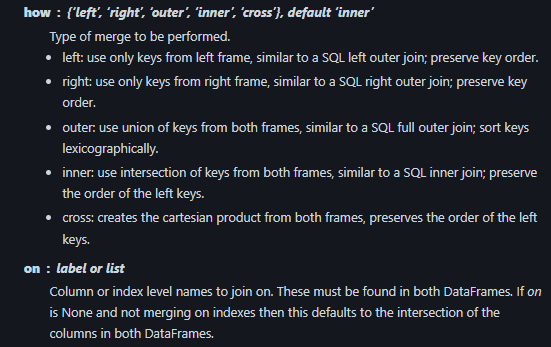

In [65]:
faang_outer = pd.merge(faang8_1, faang, on = ['ticker','date'], how = 'outer') # outer joining the new data frame and the old one
faang_outer

,date,ticker,event,open,high,low,close,volume
0,2018-03-19,FB,Disappointing user growth announced after close.,177.010,177.17,170.06,172.56,88140060
1,2018-03-20,FB,Cambridge Analytica story,167.470,170.20,161.95,168.15,129851768
2,2018-07-25,FB,FTC investigation,215.715,218.62,214.27,217.50,64592585
3,2018-01-02,FB,NaN,177.680,181.58,177.55,181.42,18151903
4,2018-01-03,FB,NaN,181.880,184.78,181.33,184.67,16886563
...,...,...,...,...,...,...,...,...
1250,2018-12-24,GOOG,NaN,973.900,1003.54,970.11,976.22,1590328
1251,2018-12-26,GOOG,NaN,989.010,1040.00,983.00,1039.46,2373270
1252,2018-12-27,GOOG,NaN,1017.150,1043.89,997.00,1043.88,2109777
1253,2018-12-28,GOOG,NaN,1049.620,1055.56,1033.10,1037.08,1413772




---



---



**9. Use the transform() method on the FAANG data to represent all the values in terms of the first date in the data. To do so, divide all the values for each ticker by the values
for the first date in the data for that ticker. This is referred to as an index, and the data for the first date is the base (https://ec.europa.eu/eurostat/statistics-explained/
index.php/ Beginners:Statisticalconcept-Indexandbaseyear). When data is in this format, we can easily see growth over time. Hint: transform() can take a function name**

In [86]:
faang9_1 = faang.groupby('ticker').transform(lambda x : x / x.iloc[0]) #using the groupby so that each ticker is properly grouped
                                                                       # with that, we can divide each value to its data on the first date for that
                                                                       # certain ticker
faang9_1

<ipython-input-86-83f6732f4d5e>:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  faang9_1 = faang.groupby('ticker').transform(lambda x : x / x.iloc[0])


,open,high,low,close,volume
0,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.023638,1.017623,1.021290,1.017914,0.930292
2,1.040635,1.025498,1.036889,1.016040,0.764707
3,1.044518,1.029298,1.041566,1.029931,0.747830
4,1.053579,1.040313,1.049451,1.037813,0.991341
...,...,...,...,...,...
1250,0.928993,0.940578,0.928131,0.916638,1.285047
1251,0.943406,0.974750,0.940463,0.976019,1.917695
1252,0.970248,0.978396,0.953857,0.980169,1.704782
1253,1.001221,0.989334,0.988395,0.973784,1.142383
